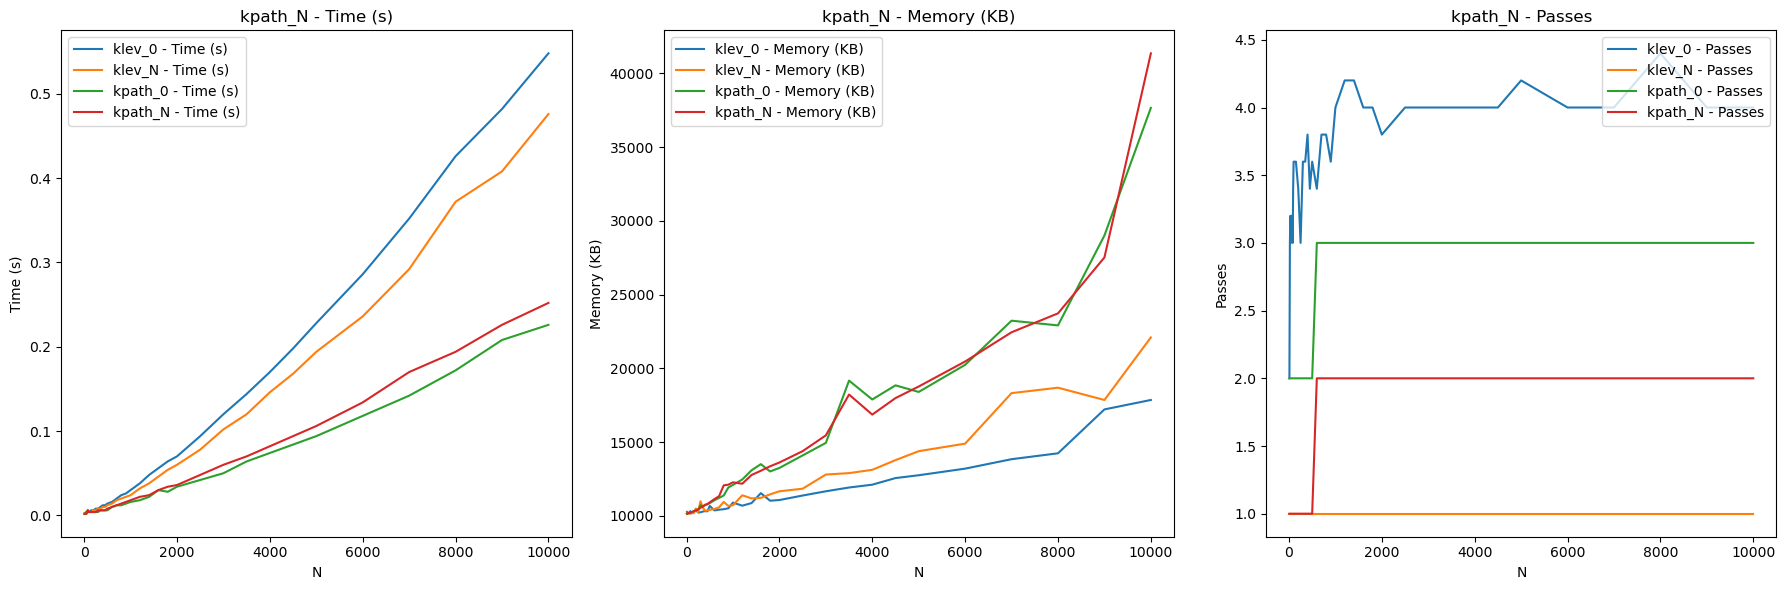

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Define the folder path
folder_path = '../../results/random/uniform_figure_2/run_{}_seed_{}/sparsity_{}/'

# Function to read CSV files
def read_csv_files(run, seed, sparsity):
    path = folder_path.format(run, seed, sparsity)
    klev_0 = pd.read_csv(os.path.join(path, 'klev_0_results.csv'))
    klev_N = pd.read_csv(os.path.join(path, 'klev_N_results.csv'))
    kpath_0 = pd.read_csv(os.path.join(path, 'kpath_0_results.csv'))
    kpath_N = pd.read_csv(os.path.join(path, 'kpath_N_results.csv'))
    return klev_0, klev_N, kpath_0, kpath_N

# Function to plot data
def plot_data(run, seed, sparsity):
    klev_0, klev_N, kpath_0, kpath_N = read_csv_files(run, seed, sparsity)

    fig, axs = plt.subplots(1, 3, figsize=(18, 6))  # Adjust figsize to control the overall size

    files = [(klev_0, 'klev_0'), (klev_N, 'klev_N'), (kpath_0, 'kpath_0'), (kpath_N, 'kpath_N')]
    columns = ['Time (s)', 'Memory (KB)', 'Passes']

    for i, (data, name) in enumerate(files):
        for j, column in enumerate(columns):
            axs[j].plot(data['N'], data[column], label=f'{name} - {column}')
            axs[j].set_title(f'Sparsity - {sparsity} Seed - {data} - {column}')
            axs[j].set_xlabel('N')
            axs[j].set_ylabel(column)
            axs[j].legend()

    # # Plot kpath_0
    # axs[2].plot(kpath_0['N'], kpath_0['value'], label='kpath_0')
    # axs[2].set_title('kpath_0')
    # axs[2].set_xlabel('N')
    # axs[2].set_ylabel('Value')
    # axs[2].legend()

    # # Plot kpath_N
    # axs[3].plot(kpath_N['N'], kpath_N['value'], label='kpath_N')
    # axs[3].set_title('kpath_N')
    # axs[3].set_xlabel('N')
    # axs[3].set_ylabel('Value')
    # axs[3].legend()

    plt.tight_layout()
    plt.show()

# Example usage
plot_data(run='20250115_145412', seed='42', sparsity='logN')